## Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

### Import libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### Loading the dataset

In [18]:
data = pd.read_csv('heart_disease_data.csv')

In [19]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* age - возраст
* sex - пол
* cp - chest pain type (0, 1, 2, 3) - тип боли в груди
* trestbps - resting blood pressure - 
* chol - serum cholestoral in mg/dl - холесторал сыворотки в мг/дл
* fbs - fasting blood sugar > 120 mg/dl - уровень сахара в крови натощак > 120 мг/дл
* restecg - resting electrocardiographic results (0,1,2) - результаты электрокардиографии покоя (значения 0,1,2)
* thalach - maximum heart rate achieved - достигнута максимальная частота сердечных сокращений
* exang - exercise induced angina - Стенокардия, вызванная физической нагрузкой
* oldpeak - ST depression induced by exercise relative to rest - депрессия ST, вызванная физическими упражнениями, по сравнению с отдыхом
* slope - the slope of the peak exercise ST segment - наклон пикового сегмента ST при нагрузке
* ca - number of major vessels (0-3) colored by flourosopy - количество магистральных сосудов (0-3), окрашенных флюороскопией
* thal - thal: 0 = normal; 1 = fixed defect; 2 = reversable defect - 0 = нормально; 1 = фиксированный дефект; 2 = обратимый дефект


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There are no missing values and no data preprocessing is required.

In [21]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for age reaches 77, the maximum of chol (serum cholestoral) is 564.

### Exploratory Data Analysis

<Axes: >

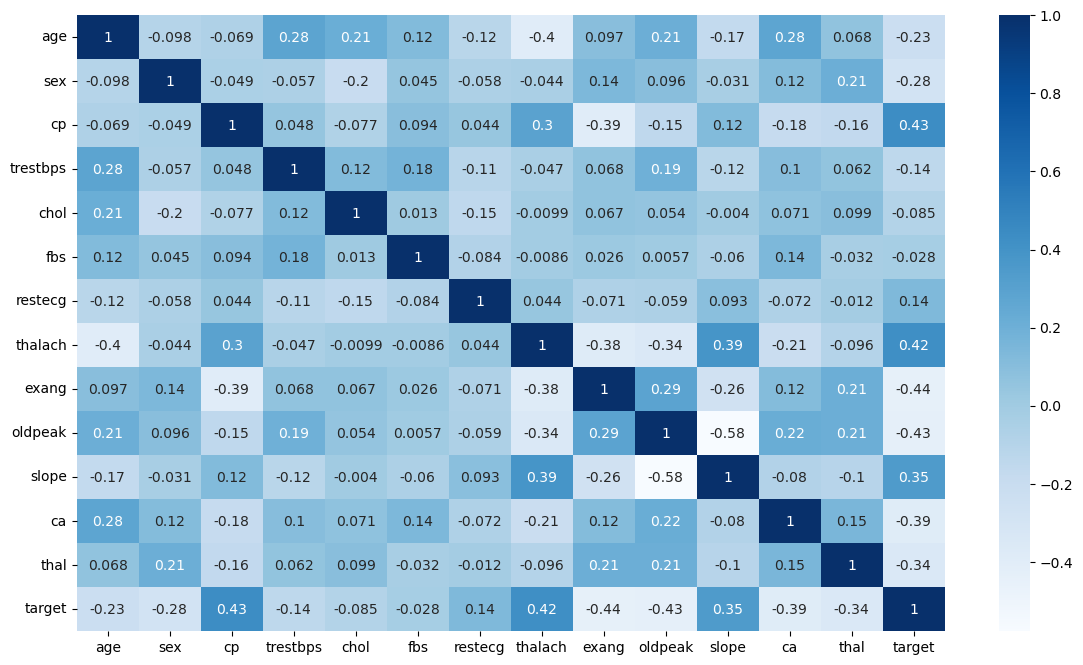

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')


In [23]:
categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [24]:
for i in categorical[:4]:
    print(i, data[i].value_counts(), sep='\n')
    print('-------------------------')
    

sex
1    207
0     96
Name: sex, dtype: int64
-------------------------
cp
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
-------------------------
fbs
0    258
1     45
Name: fbs, dtype: int64
-------------------------
restecg
1    152
0    147
2      4
Name: restecg, dtype: int64
-------------------------


In [25]:
for i in categorical[4:]:
    print(i, data[i].value_counts(), sep='\n')
    print('-------------------------')

exang
0    204
1     99
Name: exang, dtype: int64
-------------------------
slope
2    142
1    140
0     21
Name: slope, dtype: int64
-------------------------
ca
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
-------------------------
thal
2    166
3    117
1     18
0      2
Name: thal, dtype: int64
-------------------------
target
1    165
0    138
Name: target, dtype: int64
-------------------------


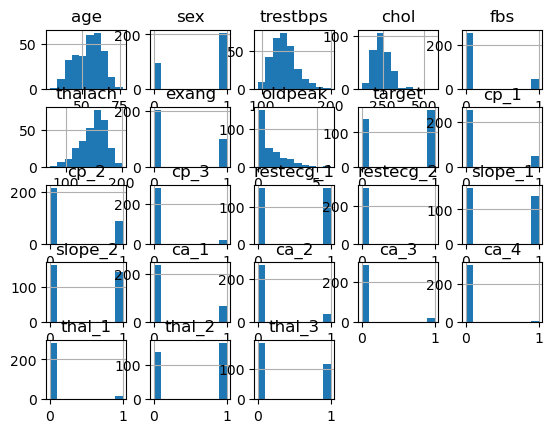

In [35]:
data.hist()
plt.show()

 Each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use. 

In [27]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1    165
0    138
Name: target, dtype: int64


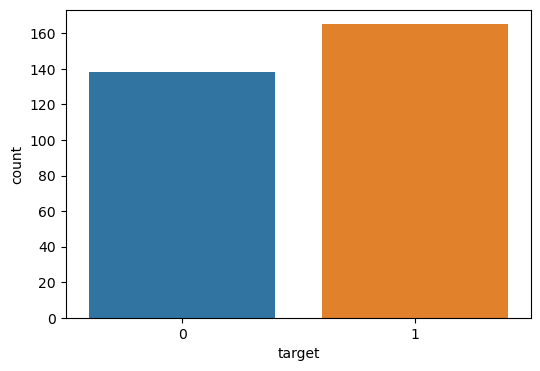

In [28]:
plt.figure(figsize=(6,4))
print(data['target'].value_counts())
sns.countplot(x=data['target'])
plt.show()

The relationship between the two classes is good and no further processing is required.

### Data Processing

Let's prepare the data for machine learning. Let's apply ```one-hot encoding``` to non-binary categorical features, form an object-feature matrix ```X```, and a vector of the target variable ```y```, and also divide the data into ```training``` and ```test``` parts, and apply ```scaling```.


In [29]:
# One hot encoding 
data = pd.get_dummies(data, columns= ['cp', 'restecg', 'slope', 'ca', 'thal'], drop_first=True)

In [30]:
X = data.drop('target', axis=1)
y= data['target']

In [31]:
#Train_test_split
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

In [32]:
#Scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain), columns=Xtrain.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns=Xtest.columns)

### Machine Learning

Machine Learning algorithms I will be using:

1) K Neighbors Classifier
2) Support Vector Classifier
3) Decision Tree Classifier
4) Random Forest Classifier

##### K Neighbors Classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params ={'n_neighbors' : range(1, 100, 1)}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
gs_knn.fit(Xtrain, ytrain)

print(gs_knn.best_estimator_)
print(gs_knn.best_score_)

KNeighborsClassifier(n_neighbors=55)
0.9072952380952382


In [46]:
ypred_knn = gs_knn.best_estimator_.predict(Xtest)
roc_auc_score(ytest, ypred_knn)

0.865505226480836

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = {'LogisticRegression' : LogisticRegression(), 
          'RandomForestClassifier' : RandomForestClassifier(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'KNeighborsClassifier' : KNeighborsClassifier()}

for name, model in models.items():
    print(f'{name}: {cross_val_score(model, X, y, cv=5).mean()}')

LogisticRegression: 0.8512568306010928
RandomForestClassifier: 0.8018032786885245
DecisionTreeClassifier: 0.7161748633879782
KNeighborsClassifier: 0.643879781420765


In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

params ={'penalty' : ['l1', 'l2', 'elasticnet'],
         'C': np.arange(0.01, 10, 0.1)}



gs_log = GridSearchCV(LogisticRegression(), param_grid=params, cv=5, scoring='roc_auc', n_jobs=-1)
gs_log.fit(Xtrain, ytrain)

print(gs_log.best_estimator_)
print(gs_log.best_score_)

LogisticRegression(C=0.31000000000000005)
0.9181206349206349


In [65]:
ypred = gs_knn.best_estimator_.predict(Xtest)
roc_auc_score(ytest, ypred)

0.865505226480836

In [66]:
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
from mlxtend.classifier import StackingCVClassifier

In [88]:
def plot_confusion_matrix(confusion_matrix, name):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix {name}')
    plt.show()

Accuracy Logistic Regression: 84.21052631578947


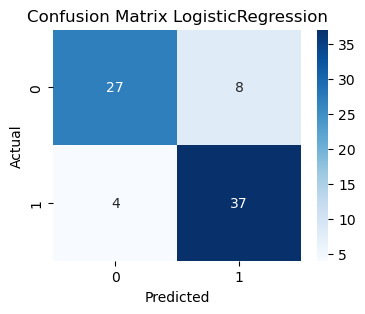

None


In [89]:
lr = LogisticRegression()
lr.fit(Xtrain, ytrain)
lr_pred = lr.predict(Xtest)
print('Accuracy Logistic Regression:', accuracy_score(ytest, lr_pred)*100)
print(plot_confusion_matrix(confusion_matrix(ytest, lr_pred), 'LogisticRegression'))

<Axes: >

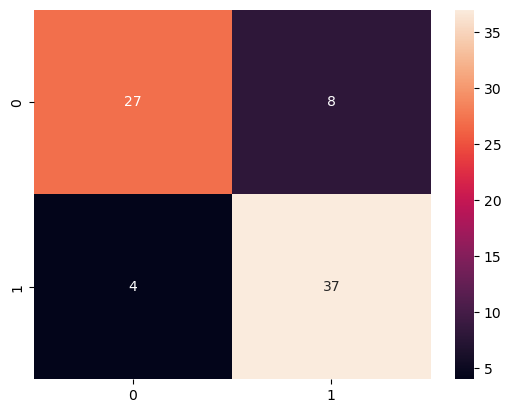